# Import Libaries

In [ ]:
%pip install datasist

In [ ]:
%pip install category_encoders

In [ ]:
# EDA Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Data Preprocessing Libraries
from datasist.structdata import detect_outliers

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Machine Learing (classification models) Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE, SelectFromModel
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#  Data Exploration

In [ ]:
df = pd.read_csv('/content/BankChurners.csv')
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1138,789198708,Existing Customer,58,M,3,Graduate,Married,$120K +,Blue,47,...,27088.0,0,27088.0,0.581,1135,24,0.846,0.000,0.000057,0.999940
7253,771422883,Attrited Customer,57,F,3,Graduate,Married,Less than $40K,Blue,45,...,1759.0,186,1573.0,0.756,2705,35,0.522,0.106,0.995590,0.004413
2904,712737108,Existing Customer,48,F,4,High School,Married,Unknown,Blue,36,...,21416.0,0,21416.0,0.702,4221,75,0.923,0.000,0.000056,0.999940
9555,778260108,Existing Customer,50,F,4,Unknown,Married,$40K - $60K,Blue,41,...,4268.0,1509,2759.0,0.562,14351,112,0.867,0.354,0.000131,0.999870
85,716396358,Existing Customer,52,M,2,Graduate,Married,$60K - $80K,Blue,47,...,3085.0,1910,1175.0,0.921,1531,35,0.667,0.619,0.000066,0.999930
6218,713463708,Attrited Customer,40,F,4,Graduate,Single,Less than $40K,Blue,25,...,1438.3,0,1438.3,0.628,2493,42,0.500,0.000,0.995040,0.004955
9220,721114458,Existing Customer,46,M,4,College,Single,$120K +,Blue,36,...,34516.0,585,33931.0,0.802,14319,96,0.655,0.017,0.000116,0.999880
7681,787458783,Existing Customer,49,F,4,High School,Married,Less than $40K,Blue,35,...,3038.0,2133,905.0,0.689,4784,83,0.694,0.702,0.000183,0.999820
4368,715762083,Existing Customer,46,M,0,Uneducated,Single,$60K - $80K,Silver,36,...,30501.0,2030,28471.0,0.560,2525,45,0.500,0.067,0.000143,0.999860
9064,712009083,Existing Customer,48,M,3,Unknown,Unknown,$60K - $80K,Blue,36,...,8290.0,1030,7260.0,0.870,8980,93,0.755,0.124,0.000063,0.999940


In [ ]:
# Showing all column names
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# Dropping columns with unusual names
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

**Feature Description**
> - **`CLIENTNUM`** : Unique client identifier.
> - **`Attrition_Flag`** : Indicates whether the customer's account is active or has churned.
> - **`Customer_Age`** : Age of the customer.
> - **`Gender`** : Gender of the customer.
> - **`Dependent_count`** : Number of dependents of the customer.
> - **`Education_Level`** : Educational level of the customer.
> - **`Marital_Status`** : Marital status of the customer.
> - **`Income_Category`** : Income category of the customer.
> - **`Card_Category`** : Category of the credit card held by the customer.
> - **`Months_on_book`** : Number of months the customer has been a bank client.
> - **`Total_Relationship_Count`** : Total number of bank products held by the customer.
> - **`Months_Inactive_12_mon`** : Number of months with inactivity in the last 12 months.
> - **`Contacts_Count_12_mon`** : Number of contacts with the bank in the last 12 months.
> - **`Credit_Limit`** : Credit limit on the credit card.
> - **`Total_Revolving_Bal`** : Total revolving balance on the credit card.
> - **`Avg_Open_To_Buy`** : Average open to buy credit line on the credit card.
> - **`Total_Amt_Chng_Q4_Q1`** : Change in transaction amount over the last four quarters.
> - **`Total_Trans_Amt`** : Total transaction amount in the last 12 months.
> - **`Total_Trans_Ct`** : Total transaction count in the last 12 months.
> - **`Total_Ct_Chng_Q4_Q1`** : Change in transaction count over the last four quarters.
> - **`Avg_Utilization_Ratio`** : Average utilization ratio of the credit card.

In [ ]:
# check the dataset shape
df.shape

(10127, 21)

In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Dropping CLIENTNUM column as it's a unique identifier and not useful for predictions.
df = df.drop( 'CLIENTNUM', axis=1)

In [ ]:
# checking for duplicated values
df.duplicated().sum()

0



*   Data doesn't contain any duplicated values




## Handling Missing Data


In [ ]:
# checking for missing values in data
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64



*  Data does not contain any missing values




In [ ]:
# checking count the number of unique values in each column of the data
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [ ]:
# Descriptive analysis for numerical data
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# Descriptive analysis for categorical data
df.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [ ]:
# Splitting columns into Categorical and Numerical Features
categorical_features = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

In [ ]:
categorical_features

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [ ]:
numerical_features

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

# Exploratory Data Analysis

##  Univariate Analysis

Exploration: Categorical Features

In [ ]:
attrition_counts = df['Attrition_Flag'].value_counts()
print(attrition_counts)
print('-' * 30)
for status, count in attrition_counts.items():
    percentage = round(count / len(df) * 100, 2)
    print(f'{status}: {percentage}% of the dataset')


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
Existing Customer: 83.93% of the dataset
Attrited Customer: 16.07% of the dataset


In [ ]:
fig = px.pie(df, names='Attrition_Flag',
             title='Attrition Flag Distribution',
             color_discrete_sequence=['#ff7f0e', '#3498db'],# Setting custom color
            )

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))


# Show the pie chart
fig.show()

In [ ]:
fig = px.pie(df, names='Gender',
             title='Gender Distribution',
             color_discrete_sequence=['#ff7f0e', '#3498db'],# Setting custom color
            )

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))


# Show the pie chart
fig.show()

In [ ]:
fig = px.histogram(df, x='Customer_Age',
                   title='Age Customer Distribution',
                   color_discrete_sequence=['#3498db'],  # Setting custom color
                  )

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [ ]:
fig = px.histogram(df, x='Education_Level',
                   title='Education Level Distribution',
                   color_discrete_sequence=['#3498db'],  # Setting custom color
                  )

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [ ]:
fig = px.histogram(df, x='Marital_Status',
                   title='Marital Status Distribution',
                   color_discrete_sequence=['#3498db'],  # Setting custom color
                  )

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [ ]:
fig = px.histogram(df, x='Income_Category',
                   title='Income Category Distribution',
                   color_discrete_sequence=['#3498db'],  # Setting custom color
                  )

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

In [ ]:
fig = px.histogram(df, x='Card_Category',
                   title='Card Category Distribution',
                   color_discrete_sequence=['#3498db'],  # Setting custom color
                  )

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show()

The bar plot above give us some insights:

*   Most of the credit card users are graduate student

*   Most of the credit card users are married

*   Most of the credit card users are people with income less than $40k a year

*   Most of the credit card users are using "blue" card type










Exploration: Numerical Features

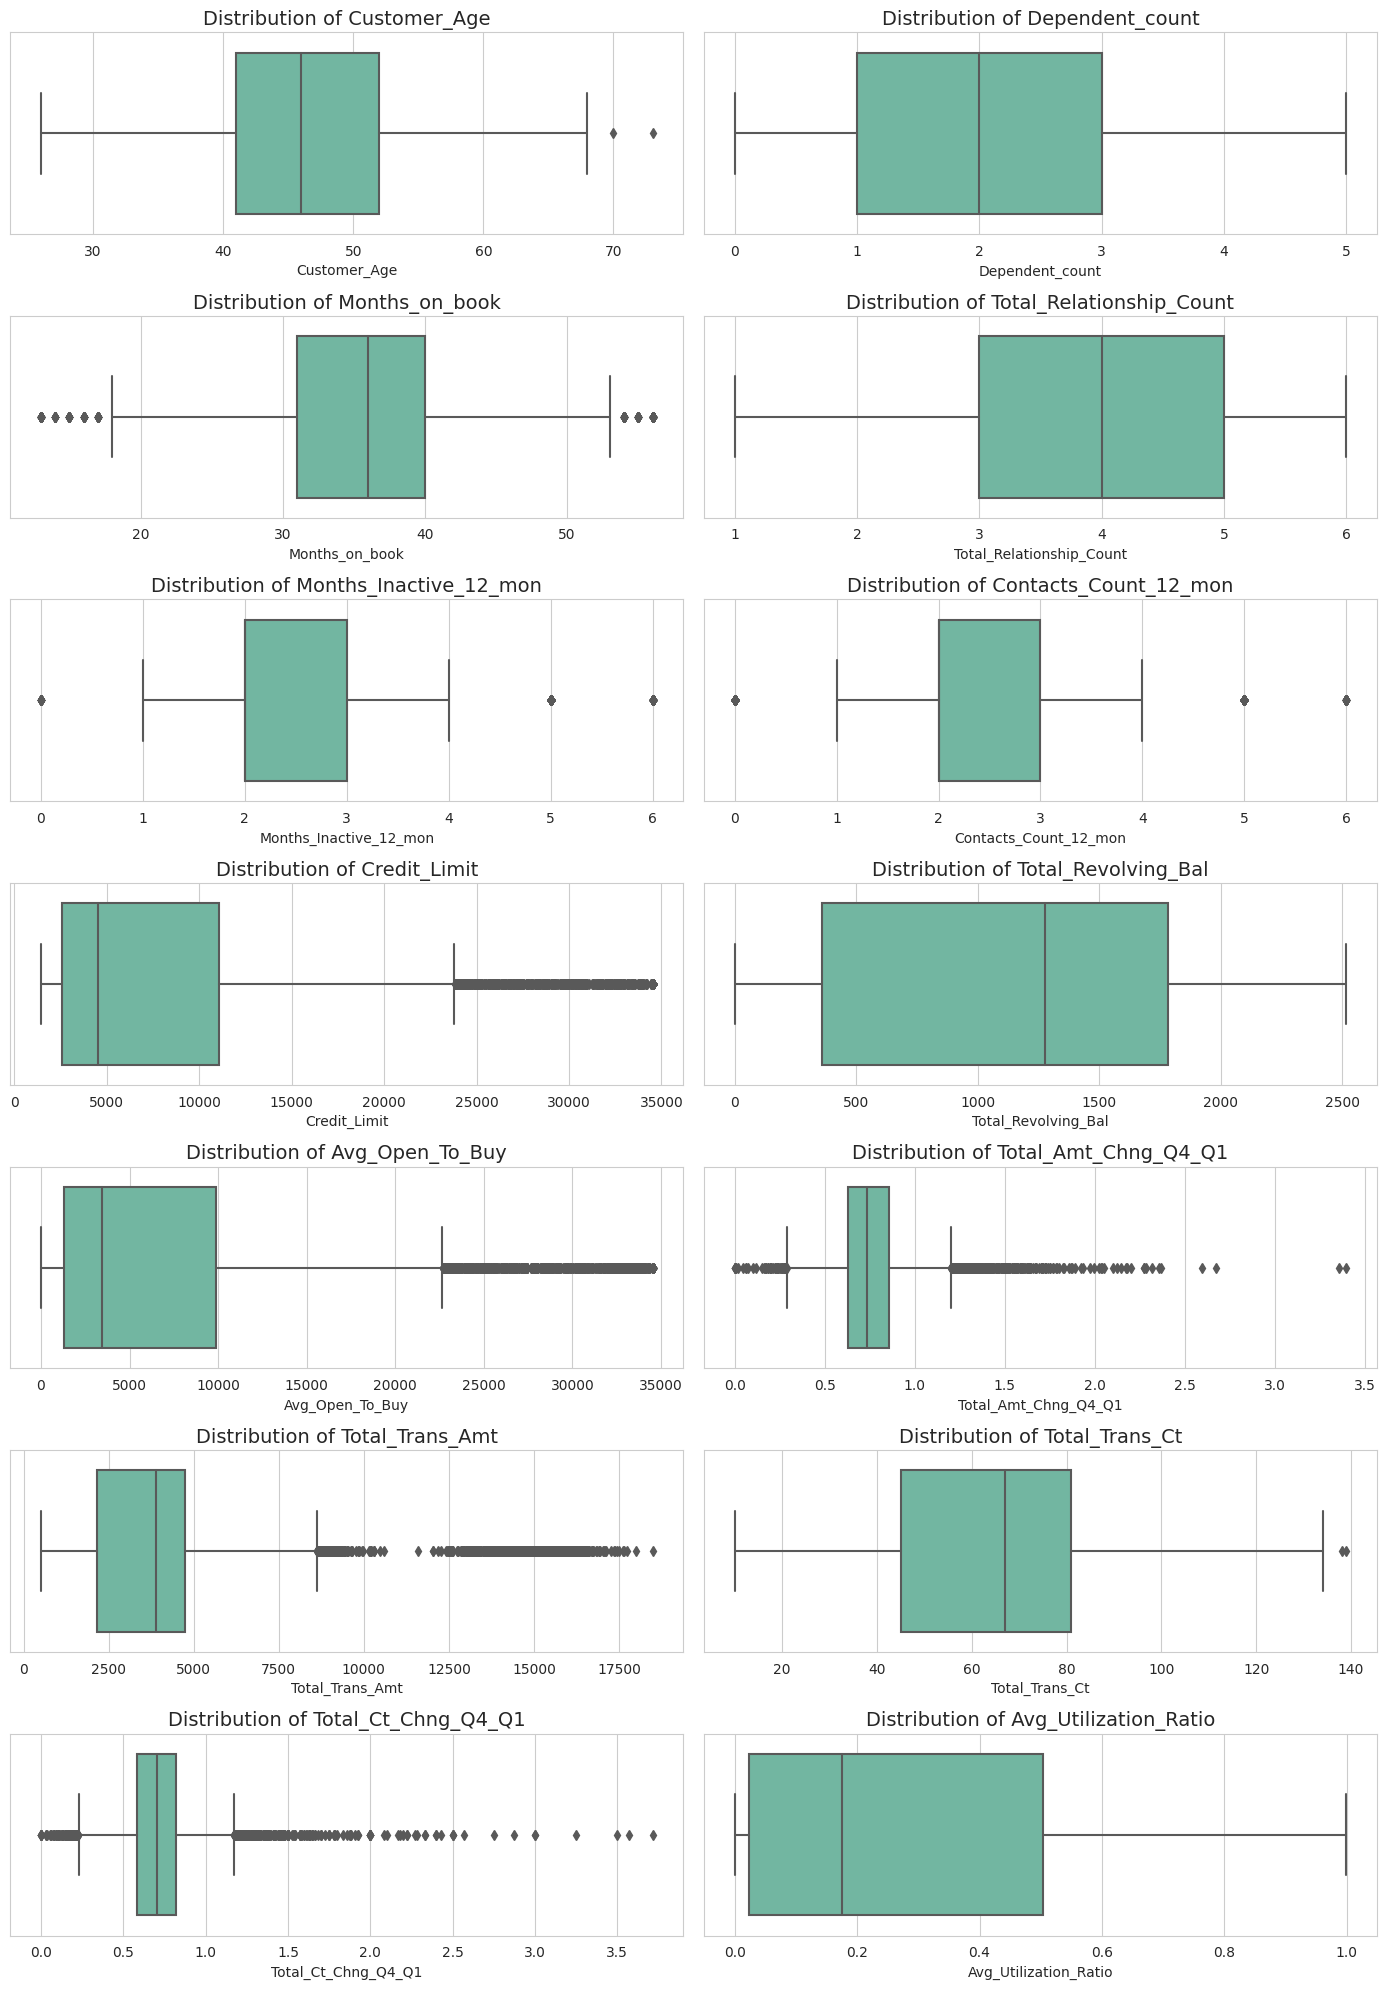

In [ ]:
# Create subplots with specified dimensions
fig, axes = plt.subplots(7, 2, figsize=(14, 20))  # Adjust the figsize according to your preference

# Plot distribution plots for each skewed column
for i, column in enumerate(numerical_features):
    row = i // 2  # Calculate the row for the subplot
    col = i % 2   # Calculate the column for the subplot
    sns.boxplot(data=df, x=column, ax=axes[row, col], palette='Set2', orient='h', color='skyblue')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14)

# Remove any empty subplots if there are fewer numerical features than expected
for i in range(len(numerical_features), 7 * 2):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Skewed Continuous Features Exploration

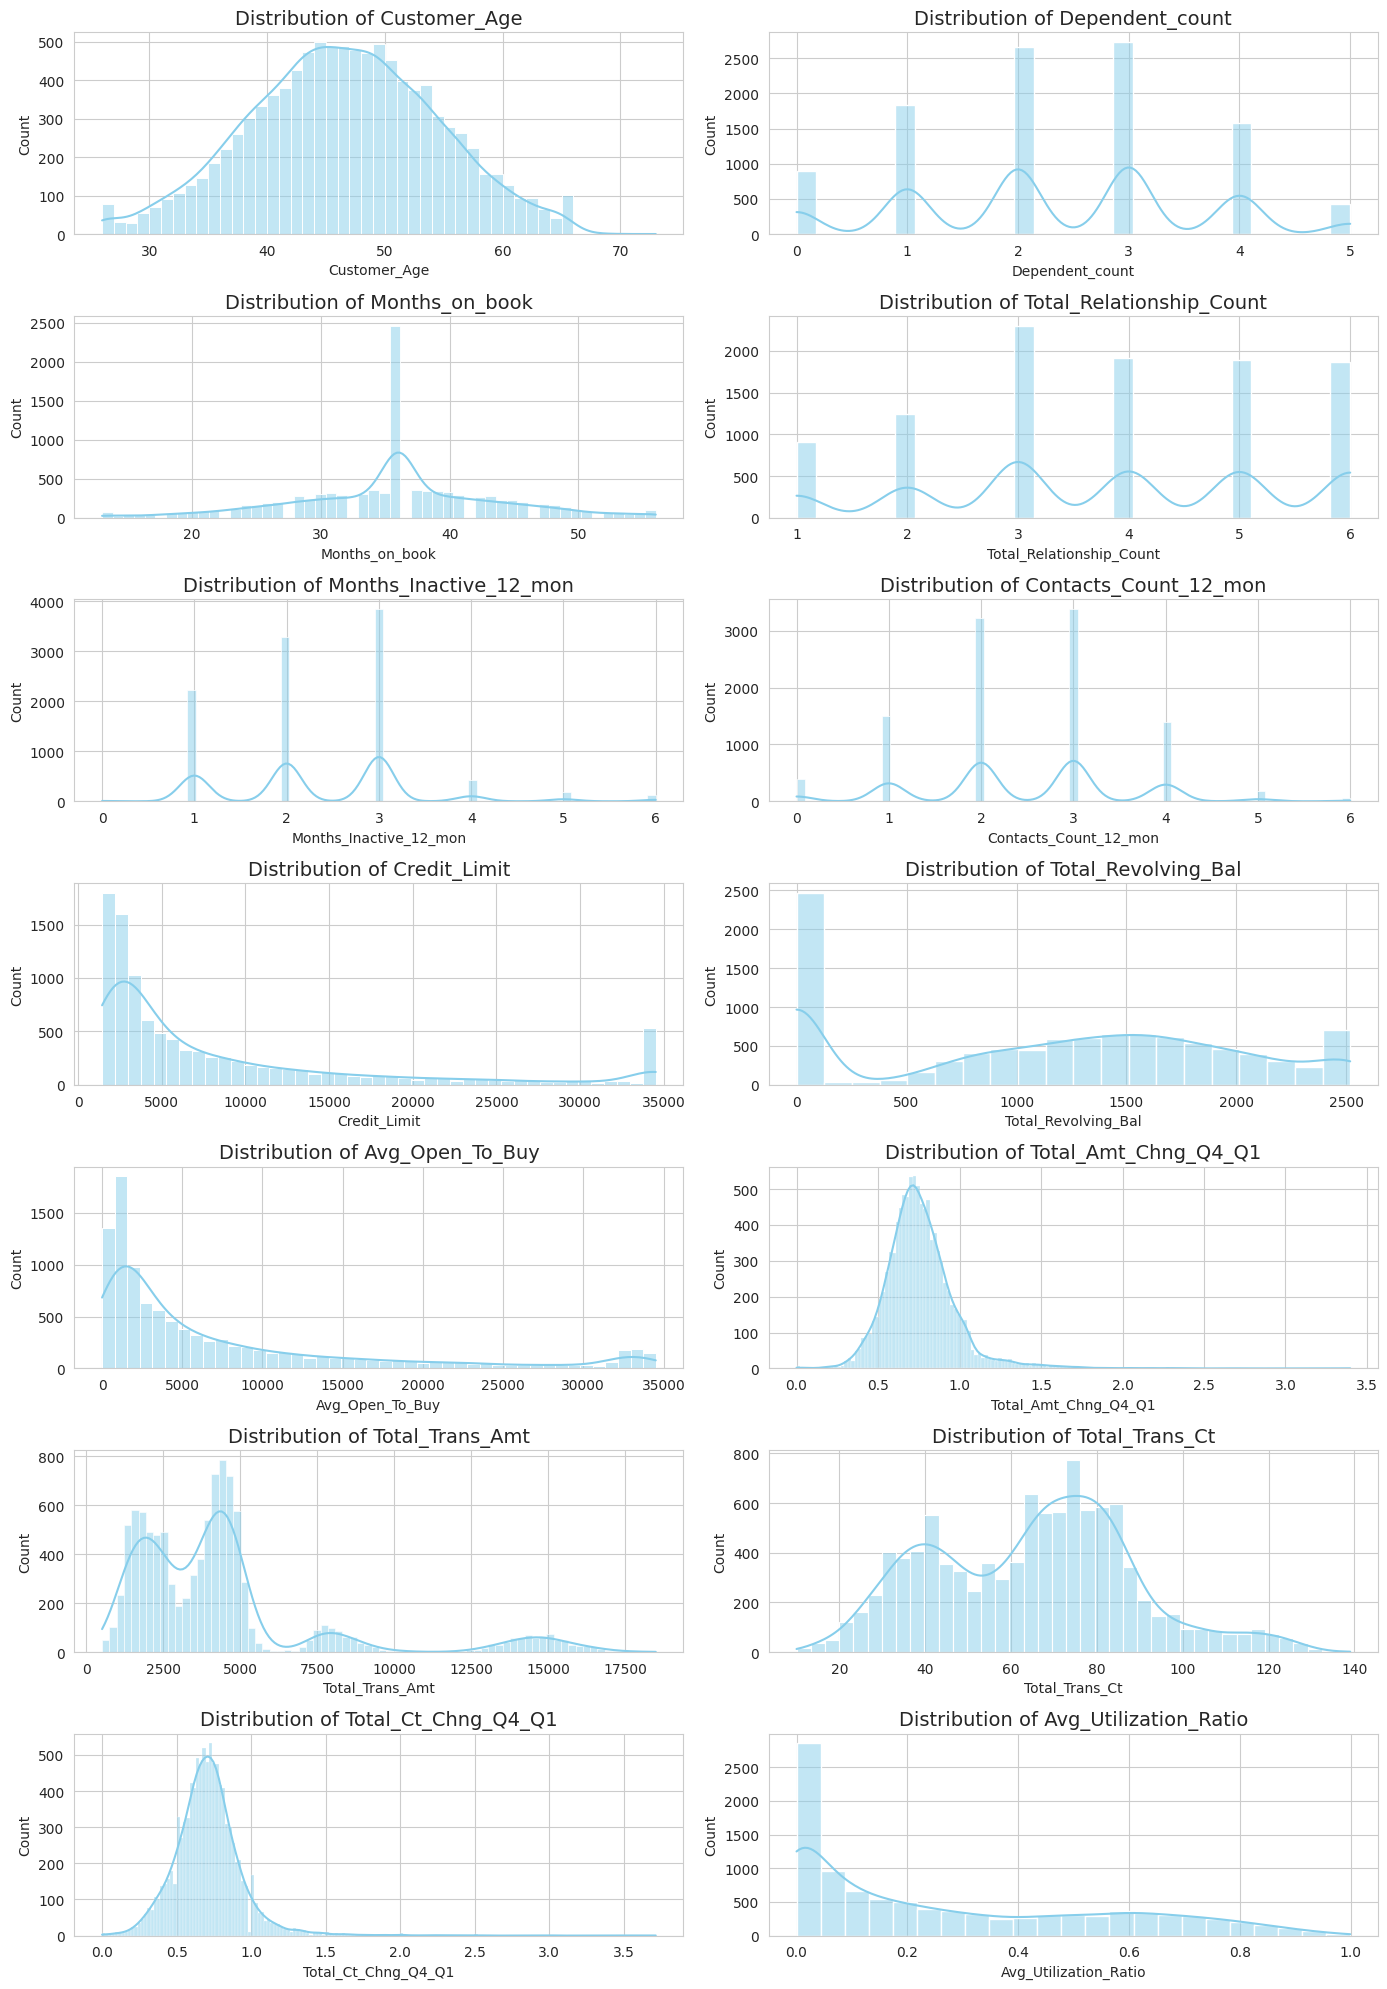

In [ ]:
# Create subplots with specified dimensions
fig, axes = plt.subplots(7, 2, figsize=(14, 20))  # Adjust the figsize according to your preference

# Plot distribution plots for each skewed column
for i, column in enumerate(numerical_features):
    row = i // 2  # Calculate the row for the subplot
    col = i % 2   # Calculate the column for the subplot
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14)

# Remove any empty subplots if there are fewer numerical features than expected
for i in range(len(numerical_features), 7 * 2):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

##  Bivariate Analysis

Relationship between churn status and other categorical variable.

In [ ]:
fig = px.histogram(df, x='Gender', color='Attrition_Flag',
             title='Churn Rates by Gender',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#ff7f0e', '#3498db']
            )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()


In [ ]:
fig = px.histogram(df, x='Education_Level', color='Attrition_Flag',
             title='Churn Rates by Education Level',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#ff7f0e', '#3498db']
            )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

In [ ]:
fig = px.histogram(df, x='Marital_Status', color='Attrition_Flag',
             title='Churn Rates by Marital Status',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#ff7f0e', '#3498db']
            )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

In [ ]:
fig = px.histogram(df, x='Income_Category', color='Attrition_Flag',
             title='Churn Rates by Income Category',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#ff7f0e', '#3498db']
            )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

In [ ]:
fig = px.histogram(df, x='Customer_Age', color='Attrition_Flag',
             title='Churn Rates by Customer Age',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#ff7f0e', '#3498db']
            )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

In [ ]:
fig = px.histogram(df, x='Card_Category', color='Attrition_Flag',
             title='Churn Rates by Card Category',
             labels={'country': 'Country', 'state': 'Project State'},
             template='plotly_white', barmode='group',
             color_discrete_sequence=['#ff7f0e', '#3498db']
            )

# Customizing marker appearance
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

# Show the plot
fig.show()

# Data Preprocessing

## Handling Outliers

In [ ]:
# Detect outliers in numerical features
outliers_indices = detect_outliers(df, features=numerical_features, n=1.5)
number_of_outliers = len(outliers_indices)

# Print the number of outliers
print(f'Number of outliers: {number_of_outliers}')

Number of outliers: 1274


In [ ]:
# Removing all Outliers
df = df.drop(outliers_indices)

In [ ]:
print(f"Dataset Shape After Removing Outliers {df.shape}")

Dataset Shape After Removing Outliers (8853, 20)


## Handling Categorical Data



*   **Nominal**: Categories without a meaningful order or ranking like (**Attrition Flag, Gender, Marital Status**).
*   **Ordinal**: Categories with a meaningful order or ranking like (**Education Level, Income Category, Card Category**).



In [ ]:
# Working with Ordinal Features with pandas `map` method.

attrition_flag_dic = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

edu_level_dic = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Post-Graduate': 4,
    'Graduate': 5,
    'Doctorate': 6
}

income_cat_dic = {
    'Unknown': 0,
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
}

card_cat_dic = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

df['Attrition_Flag'] = df['Attrition_Flag'].map(attrition_flag_dic)

df['Education_Level'] = df['Education_Level'].map(edu_level_dic)

df['Income_Category'] = df['Income_Category'].map(income_cat_dic)

df['Card_Category'] = df['Card_Category'].map(card_cat_dic)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,0,44,M,2,5,Married,2,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
9,0,48,M,2,5,Single,4,0,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
10,0,42,M,5,1,Unknown,5,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,0,35,M,3,5,Unknown,3,0,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
14,0,57,F,2,5,Married,1,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279


In [ ]:
# Working with Nominal Features with pandas `get_dummies` function.
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status'])

encoded = list(df.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

24 total features after one-hot encoding.


In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
5,0,44,2,5,2,0,36,3,1,2,...,1088,24,0.846,0.311,0,1,0,1,0,0
9,0,48,2,5,4,0,36,6,3,3,...,1441,32,0.882,0.144,0,1,0,0,1,0
10,0,42,5,1,5,0,31,5,3,2,...,1201,42,0.680,0.217,0,1,0,0,0,1
13,0,35,3,5,3,0,30,5,1,3,...,1311,33,2.000,0.195,0,1,0,0,0,1
14,0,57,2,5,1,0,48,5,2,2,...,1570,29,0.611,0.279,1,0,0,1,0,0


## Data Split to Train and Test Sets

In [ ]:
# First we extract the x Featues and y Label
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

In [ ]:
x.shape, y.shape

((8853, 23), (8853,))

In [ ]:
# Then we Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7082 samples.
Testing set has 1771 samples.


In [ ]:
y_train.value_counts()

0    5940
1    1142
Name: Attrition_Flag, dtype: int64



*   Data is imbalanced so we're using SMOTE to balance the data because under-sampling can cause data loss and affect prediction quality when the initial data is imbalanced.




In [ ]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

1    5940
0    5940
Name: Attrition_Flag, dtype: int64



*   Now the Data is balanced




## Feature Scaling

Standardizing Continuous Features with StandardScaler

In [ ]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting the StandardScaler on the training data
scaler.fit(X_train[numerical_features])

# Transforming (standardize) the continuous features in the training and testing data
X_train_cont_scaled = scaler.transform(X_train[numerical_features])
X_test_cont_scaled = scaler.transform(X_test[numerical_features])

# Replacing the scaled continuous features in the original data
X_train[numerical_features] = X_train_cont_scaled
X_test[numerical_features] = X_test_cont_scaled

X_train

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0.931732,-0.163926,3,1,0,1.154546,-0.331522,0.751478,0.479457,-0.867929,...,-0.307218,-0.379144,-0.212054,-0.887260,1,0,0,1,0,0
1,-0.708602,0.664771,4,5,0,-0.933402,1.665344,-1.539401,0.479457,-0.469235,...,0.408667,1.045911,-0.307518,1.660662,0,1,1,0,0,0
2,-2.075548,-0.992623,4,1,1,0.040974,1.665344,0.751478,2.467920,1.282810,...,1.356445,0.632186,-0.078405,-0.887260,0,1,0,0,1,0
3,1.205121,-0.163926,3,1,0,1.015350,0.999722,-0.393962,-1.509006,-0.716591,...,0.296976,0.770094,-0.274106,1.234825,1,0,1,0,0,0
4,-0.708602,0.664771,5,2,0,-0.933402,0.999722,-1.539401,0.479457,-0.767367,...,-0.228503,0.080551,1.081478,1.025456,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,0.384954,-0.163926,5,1,0,0.319367,0.999722,-0.393962,-0.514774,-0.725733,...,-1.056080,-1.712261,0.803073,-0.887260,1,0,0,0,0,0
11876,-0.435213,0.664771,5,1,0,0.040974,-1.662767,-0.393962,1.473689,-0.861658,...,-0.614280,-0.654961,-0.985870,-0.887260,1,0,0,0,0,0
11877,-0.298519,0.664771,1,5,0,0.040974,-0.997145,0.751478,-0.514774,-0.145223,...,-0.372460,-0.471083,-1.665567,-0.576274,0,1,0,0,0,0
11878,2.025289,-0.992623,2,2,0,1.432940,-0.997145,0.751478,-0.514774,0.329941,...,0.541278,0.632186,-0.047446,0.234086,0,0,0,0,1,0


# Models Training and Evaluation

In [ ]:
# List of classifiers to evaluate
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter= 1500, n_jobs=-1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs =-1)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("LightGBM", lgb.LGBMClassifier(random_state=42, verbose=-1)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1))
]

K-fold Cross-Validation Evaluation and Feature Selection



> Applying cross-validation through pipelines helps us thoroughly test machine learning models. It checks their performance across various data sets, ensuring a strong evaluation. By integrating feature selection within this process through pipelines, we carefully choose the best features. This method involves testing these features on different data parts, guaranteeing they work well across different situations. This meticulous approach ensures our selected features are reliable and effective, leading to a robust and widely applicable model.



In [ ]:
# Initialize RFE feature selector
RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1), n_features_to_select=12)


# Creating lists for classifier names, mean_test_accuracy_scores, and results.
results = []
mean_test_accuracy_scores = []
classifier_names = []

for model_name, model in classifiers:
    # Print model name
    print(f"For {model_name}:")

    # Steps Creation
    steps = list()

    steps.append(('feature_selector', RFE_selector))  # RFE feature selection

    steps.append((model_name, model))

    # Create the pipeline
    pipeline = Pipeline(steps=steps)

    # 5-fold Stratified Cross-Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation with train scores
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy',n_jobs=-1, return_train_score=True)

    print(f"Cross-validation completed successfully for {model_name}")
    print('*' * 50)

    # Append results to the list
    results.append({
        "Model Name": model_name,
        "Mean Train Accuracy": np.mean(cv_results['train_score']),
        "Mean Test Accuracy": np.mean(cv_results['test_score'])
    })

    mean_test_accuracy_scores.append(np.mean(cv_results['test_score']))
    classifier_names.append(model_name)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)

For Logistic Regression:
Cross-validation completed successfully for Logistic Regression
**************************************************
For Decision Tree:
Cross-validation completed successfully for Decision Tree
**************************************************
For Random Forest:
Cross-validation completed successfully for Random Forest
**************************************************
For AdaBoost:
Cross-validation completed successfully for AdaBoost
**************************************************
For Gradient Boosting:
Cross-validation completed successfully for Gradient Boosting
**************************************************
For LightGBM:
Cross-validation completed successfully for LightGBM
**************************************************
For XGBoost:
Cross-validation completed successfully for XGBoost
**************************************************


,Model Name,Mean Train Accuracy,Mean Test Accuracy
0,Logistic Regression,0.856923,0.855303
1,Decision Tree,1.000000,0.951263
2,Random Forest,1.000000,0.977441
3,AdaBoost,0.956040,0.951936
4,Gradient Boosting,0.973295,0.964562
5,LightGBM,0.999263,0.978114
6,XGBoost,0.999979,0.978956


Mean Test Accuracy Scores by Classifiers

In [ ]:
# Creating a DataFrame from the data
data = pd.DataFrame({'Classifier': classifier_names, 'Test Accuracy': mean_test_accuracy_scores})

# Creating Plotly bar chart
fig = px.bar(data, x='Test Accuracy', y='Classifier', orientation='h', color='Test Accuracy',
             title='Mean Test Accuracy Scores by Classifiers', text='Test Accuracy', color_continuous_scale='viridis')

# Customizing the layout
fig.update_layout(
    xaxis_title='Test Accuracy',
    yaxis_title='Classifier',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(categoryorder='total ascending'),
    showlegend=False,
    height=500,
    width=900
)

fig.show()

Among the various models evaluated during cross-validation, XGBoost Classifier emerged as the top performer. It exhibited exceptional performance with a Excellent Mean Train Accuracy score and an outstanding Mean Test Accuracy score Notably, the model demonstrated no signs of overfitting, making it our chosen model for further analysis.

## Selected Features

In [ ]:
# Initialize RFE feature selector
RFE_selector = RFE(lgb.LGBMClassifier(random_state=42, verbose=-1), n_features_to_select=12)

# Fit RFE selector to the training data
RFE_selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = np.where(RFE_selector.support_)[0]

# Get the names of the selected features based on their indices
selected_feature_names = X_train.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


## Training the Chosen Model (XGBoost Classifier)


In [ ]:
# Define the pipeline with the feature selector
pipeline = Pipeline(steps=[
    ('feature_selector', RFE_selector),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1))
])

pipeline.fit(X_train, y_train)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing model details
print(f'Model: XGBoost')
print(f'Training Accuracy: {accuracy_score(y_train, pipeline.predict(X_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1-score: {f1}')
print('------------------------------------------------------------------')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('------------------------------------------------------------------')
print(f'Testing Classification report: \n{classification_report(y_test, y_pred)}')
print('------------------------------------------------------------------')

Model: XGBoost
Training Accuracy: 0.9998316498316498
Testing Accuracy: 0.9666854884246189
F1-score: 0.9666592814505368
------------------------------------------------------------------
Testing Confusion Matrix: 
[[1479   29]
 [  30  233]]
------------------------------------------------------------------
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1508
           1       0.89      0.89      0.89       263

    accuracy                           0.97      1771
   macro avg       0.93      0.93      0.93      1771
weighted avg       0.97      0.97      0.97      1771

------------------------------------------------------------------


 **Models Predictions Conclusion**


*   Great, XGBoost demonstrates outstanding training and testing performance, showing no signs of overfitting and achieving an impressive F1-score of 96%.
*  Next, we'll work on improving the XGBoost model to see if we can make it more accurate.



# Hyperparameter Tuning

Hyperparameter tuning with GridSearch is crucial for optimizing model accuracy, preventing overfitting, and ensuring stable, robust predictions. It saves time, enhances computational efficiency, and leads to better-informed decisions, making it indispensable in machine learning model development.

## Hyperparameter Tuning for XGBoost Classifier

In [ ]:
param_grid = {
    'XGBoost__learning_rate': [0.01, 0.1, 0.2],
    'XGBoost__n_estimators': [100, 200, 300],
    'XGBoost__max_depth': [3, 4, 5],
}

In [ ]:
steps=[]
steps.append(('feature_selector', RFE_selector))
steps.append(("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1)))
pipeline=Pipeline(steps=steps)

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,
                           return_train_score=True)

# Fit the pipeline with GridSearch to the data
grid_search.fit(x, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'XGBoost__learning_rate': 0.2, 'XGBoost__max_depth': 3, 'XGBoost__n_estimators': 300}
Best Score: 0.9365171453454432


In [ ]:
# Get the mean test score and mean train score for the best estimator
mean_test_score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
mean_train_score = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]

print("Mean Test Score:", mean_test_score)
print("Mean Train Score:", mean_train_score)

Mean Test Score: 0.9365171453454432
Mean Train Score: 0.9977409066970196




> The initial settings for XGBoost worked well, and even after trying different configurations, we didn't see much improvement in accuracy.


In [ ]:
final_model=grid_search.best_estimator_

In [ ]:
final_model

Pipeline(steps=[('feature_selector',
                 RFE(estimator=LGBMClassifier(random_state=42, verbose=-1),
                     n_features_to_select=12)),
                ('XGBoost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=...None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

## ROC Curve for Final Model (XGBoost Classifier)

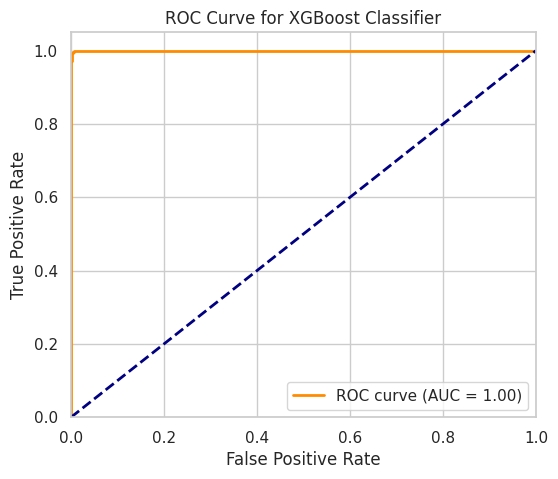

In [ ]:
# Predict probabilities for the positive class using the final model
y_probabilities = final_model.predict_proba(x)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_probabilities)
auc = roc_auc_score(y, y_probabilities)

# Plotting the ROC curve
sns.set(style='whitegrid')
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc='lower right')
plt.show()




*   An ROC curve with AUC = 1.00 means a perfect classifier. For the XGBoost Classifier, it signifies the model makes no classification errors, distinguishing all positive and negative cases perfectly.


